# Подключаем нужные библотеки и/или методы из них

Импортируем $numpy$ - нужен для работы с массивами - называем его $np$

Импортируем $matplotlib.pyplot$ - нужен для рисования графиков - называем его $plt$

Из $scipy.stats$ импортируем $expon$ - экспоненциальная рандомизация - оставляем название

Из $scipy.stats$ импортируем $norm$ - нормальная рандомизация - оставляем название


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm

# 1. Выберите непрерывное распределение

Я выбрал expon - экспоненциальное - в основном используется для подсчета вероятности поломки, зная среднее время жизни.

Функция распределения: $1 - e^{-λx}$

Плотность вероятности: $λe^{-λx}$

Дисперсия: $λ^{-2}$

Переменные: $M$ = мода; $L$ = λ; $S$ = σ; $exn$ = итоговая функция

$expon$ принимает как параметры моду и среднеквадратическое отклонение

Cреднеквадратическое отклонение: $σ = \sqrt{\mathbb{D}[X]} = \sqrt{λ^{-2}} = \sqrt{1\over{L^2}} = {1\over{L}}$

In [14]:
M = 0.0
L = 1.0
S = 1.0 / L

exn = expon(M, S)

# 2. Сгенерируйте из него выборку объёма 1000

Переменные: $sample1000$ - выборка объёма 1000

$exn.rvs$ - метод генерирующий выборку объемом равным параметру

In [15]:
sample1000 = exn.rvs(1000)

# 3. Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

$plt.hist$ - рисует гистограмму

$np.linspace(0, 5, 100)$ - создает массив с равномерным шагом из 100 элементов от 0 до 5 включительно

$exn.pdf(x)$ - для массива $x$ возвращает массив резутатов функции теоретической плотности

$plt.plot$ - рисует график для массива $x$ и результата функции теоретической плотности

$plt.xlabel$ и $plt.ylabel$ - надписи для осей x и y

$plt.legend$ - рисует описание из $label$ в $plt.hist$ и $plt.plot$

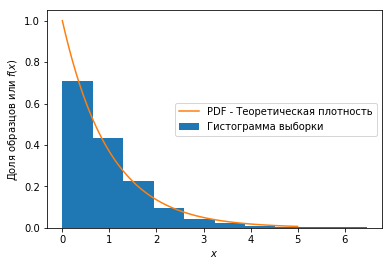

In [16]:
plt.hist(sample1000, normed=True, label=u"Гистограмма выборки")
x = np.linspace(0, 5, 100)
plt.plot(x, exn.pdf(x), label=u"PDF - Теоретическая плотность")
plt.ylabel(u"Доля образцов или $f(x)$")
plt.xlabel(u"$x$")
plt.legend(loc='center right')

# Распределение выборочного среднего вашей случайной величины

фукнция $show$ - принимает 2 параметра: $s$ - объем одной выборки; $c$ - количество выборок

$plt.figure(figsize=(20,10))$ - задаем размеры отображения графика

$exn.rvs(s)$ - генерирует выборку объемом $s$

$np.mean(...)$ - находит среднее арифметическое из элементов массива

"[... for i in range(c)]" - генерирует $c$ выборок

$exn.mean()$ - находит теоретическое среднее

$exn.var()$ - находит теоретическую дисперсию

$...bins=...$ - диапозоны для стобиков гистограммы - пример [0, 1, 2] - это 2 столбика 0-1 и 1-2 => $np.arange$(от, до, ширина столбика)

$plt.hist$ - рисует гистограмму

$np.linspace$ - создает массив с равномерным шагом

$norm(...).pdf(x)$ - для массива $x$ возвращает массив резутатов функции теоретической плотности нормального распределения

$plt.plot$ - рисует график для массива $x$ и результата функции теоретической плотности нормального распределения

$plt.xlabel$ и $plt.ylabel$ - надписи для осей x и y

$plt.legend$ - рисует описание из $label$ в $plt.hist$ и $plt.plot$

$Важно$: так как у столбца гистограммы ширину я задаю $0.1$, а нормализованная гистограмма подразумевает что сумма площадей столбцов (не высот!!!) равна единице, то высота столбца теоретически может вырасти до $10$, т.е. $10 * 0.1 = 1$

In [17]:
def show(s, c):
    plt.figure(figsize=(20,10))
    sample = np.array([np.mean(exn.rvs(s)) for i in range(c)])
    plt.hist(sample, bins=np.arange(exn.mean()-4, exn.mean()+4, 0.1),
        normed=True, label=u"Гистограмма распределений выборочных средних")
    x = np.linspace(exn.mean()-4, exn.mean()+4, 200)
    plt.plot(x, norm(exn.mean(), np.sqrt(exn.var()/float(s))).pdf(x),
        label=u"Плотность теоретического нормального распределения")
    plt.ylabel(u"Вероятность")
    plt.xlabel(u"$x$")
    plt.legend(loc=('upper right'),
        title=u"Выборка объем: %s\nКоличество выборок: %s\nexpon: M=%s; $λ=%s; σ=%s$\nnorm: M=%s; σ=%s"
        % (s, c, M, L, S, exn.mean(), np.sqrt(exn.var()/float(s))))

# 4. Постройте гистограммы распределений их выборочных средних для 1000 выборок объёма n = 5, 10, 50 
# 5. Посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних
В функции $show$ используются для $norm$ параметры $exn.mean()$ и $np.sqrt(exn.var()/float(s))$

По центральной предельной теореме:
- Мода нормального распределения = среднему исходного распределения = $exn.mean()$
- Среднеквадратическое отклонение нормального распределения = корню из дисперсии исходного распределения деленной на объем выборки

Дисперсия исходного распределения = $\mathbb{D}[X]$ = $exn.var()$

Объем выборки = $n$ = $float(s)$

Среднеквадратическое отклонение нормального распределения = $\sqrt{\mathbb{D}[X]\over{n}}$ = $np.sqrt(exn.var()/float(s))$


# 6. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения

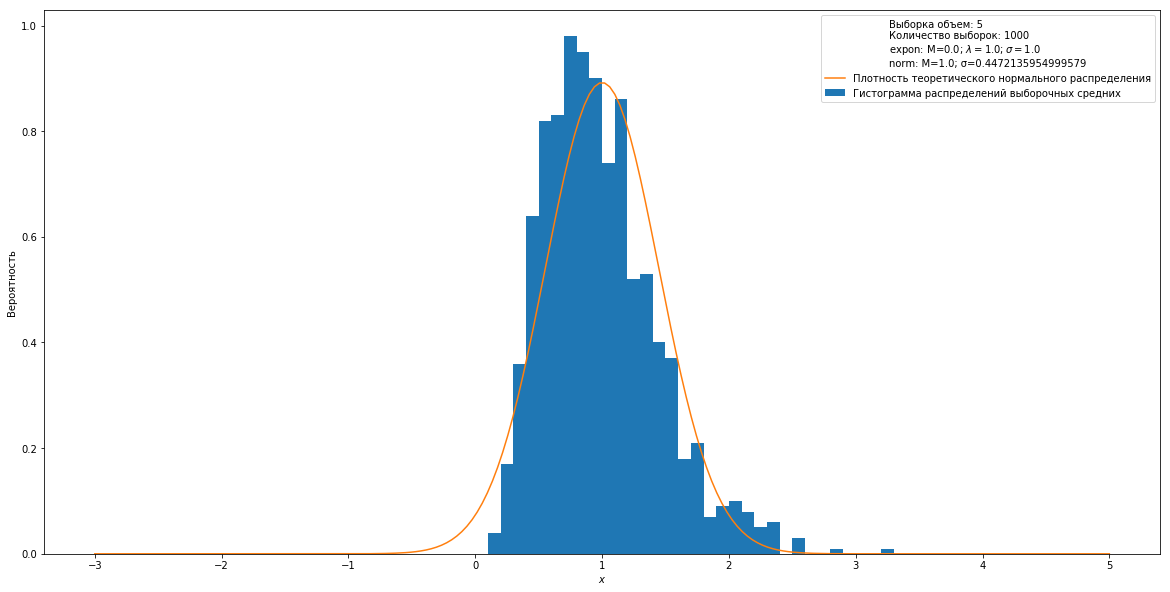

In [18]:
show(5, 1000)

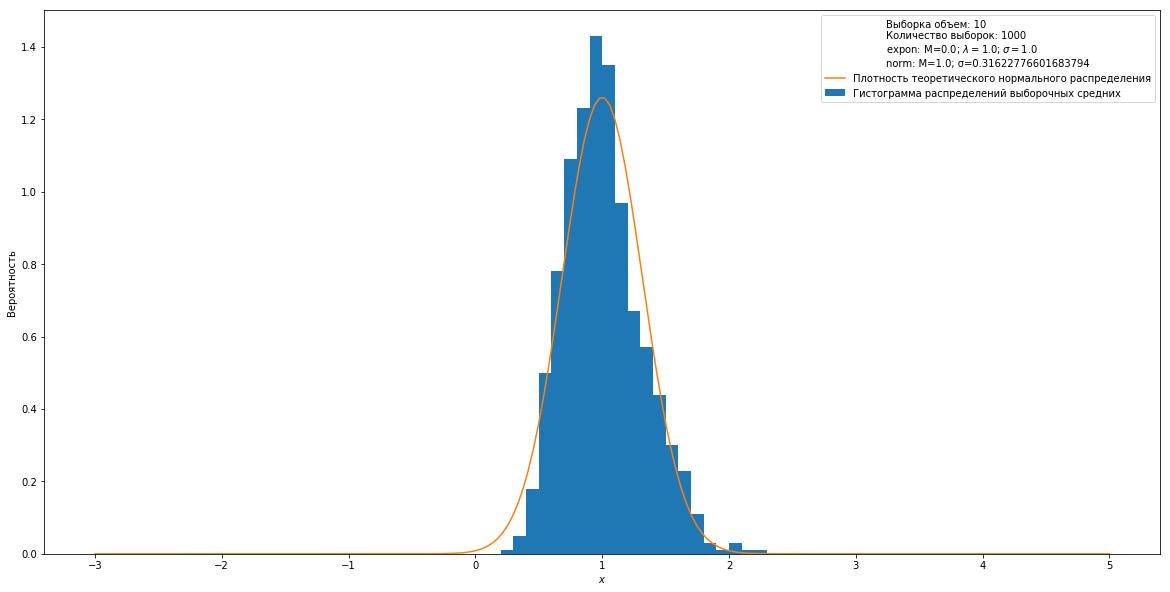

In [19]:
show(10, 1000)

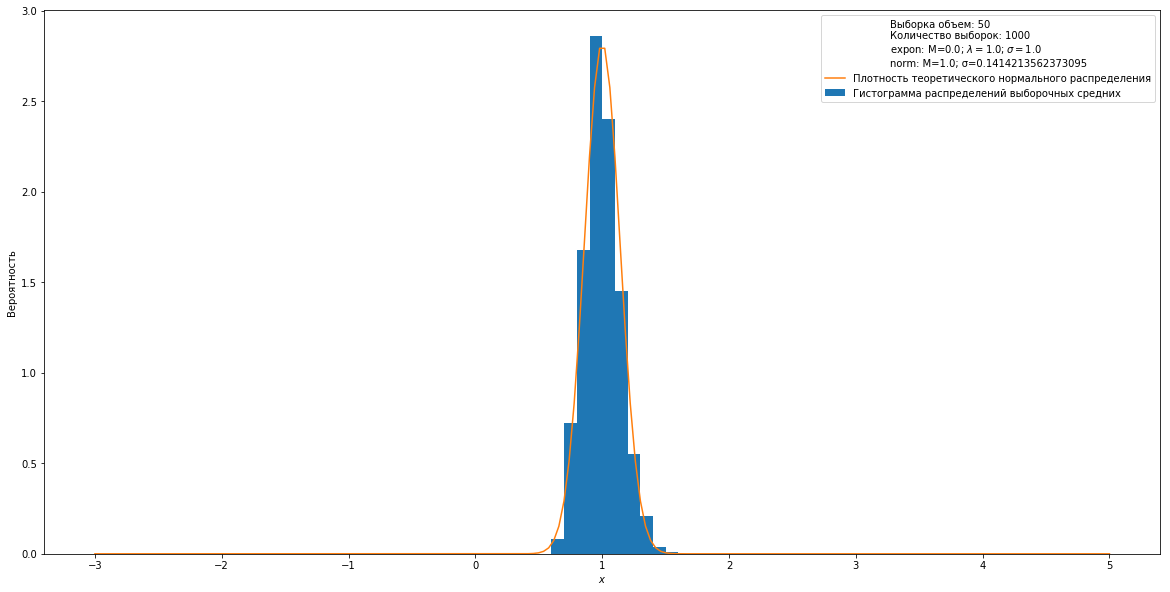

In [20]:
show(50, 1000)

# 7. Опишите разницу между полученными распределениями при различных значениях n

Чем больше $n$, тем выше и уже гистограмма распределений выборочных средних.

# 8. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

С ростом $n$ точность аппроксимации увеличивается

# 9. Выводы по результатам выполнения задания

С ростом $n$ точность аппроксимации увеличивается следовательно центральная предельная теорема работает для экспоненциального распределения